# Apply transfer learning on Pokemon data

#### Import Pokemon data

In [1]:
import numpy as np 
import tensorflow as tf 
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
pokemon_list = os.listdir("pokemon")

In [3]:
pokemon_list

['bulbasaur', 'charmander', 'mewtwo', 'pikachu', 'squirtle']

In [4]:
len(pokemon_list)

5

In [5]:
bulbasaur = os.listdir("pokemon/bulbasaur") 
charmander = os.listdir("pokemon/charmander")
mewtwo = os.listdir("pokemon/mewtwo")
pikachu = os.listdir("pokemon/pikachu")
squirtle = os.listdir("pokemon/squirtle")

## Pre-processing the data

The first time a pre-trained model is loaded, Keras will download the required model weights. By default, the model expects color input images to be rescaled to the size of 224x224, minimum is 48x48. Lets load the model using Keras.

In [6]:
data = []
labels = []

for i in bulbasaur:
    try:
    
        image = cv2.imread("pokemon/bulbasaur/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print('')
        
for i in charmander:
    try:
    
        image = cv2.imread("pokemon/charmander/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        
    except AttributeError:
        print('')
        
for i in mewtwo:
    try:
    
        image = cv2.imread("pokemon/mewtwo/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(2)
        labels.append(2)
        labels.append(2)
        labels.append(2)
        
    except AttributeError:
        print('')
        
for i in pikachu:
    try:
    
        image = cv2.imread("pokemon/pikachu/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(3)
        labels.append(3)
        labels.append(3)
        labels.append(3)
        
    except AttributeError:
        print('')
        
for i in squirtle:
    try:
    
        image = cv2.imread("pokemon/squirtle/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(4)
        labels.append(4)
        labels.append(4)
        labels.append(4)
        
    except AttributeError:
        print('')

In [7]:
pokemon = np.array(data)
labels = np.array(labels)

np.save('pokemon' , pokemon)
np.save('Labels' , labels)

In [8]:
print('Pokemon : {} | labels : {}'.format(pokemon.shape , labels.shape))

Pokemon : (1000, 64, 64, 3) | labels : (1000,)


In [9]:
# Function to convert number into string
# Switcher is dictionary data type here
def pokemon_type(argument):
    switcher={
                0:'bulbasaur',
                1:'charmander',
                2:'mewtwo',
                3:'pikachu',
                4:'squirtle'
             }
    # get() method of dictionary data type returns
    # value of passed argument if it is present
    # in dictionary otherwise second argument will
    # be assigned as default value of passed argument
    
    return switcher.get(argument,"pokemon type")

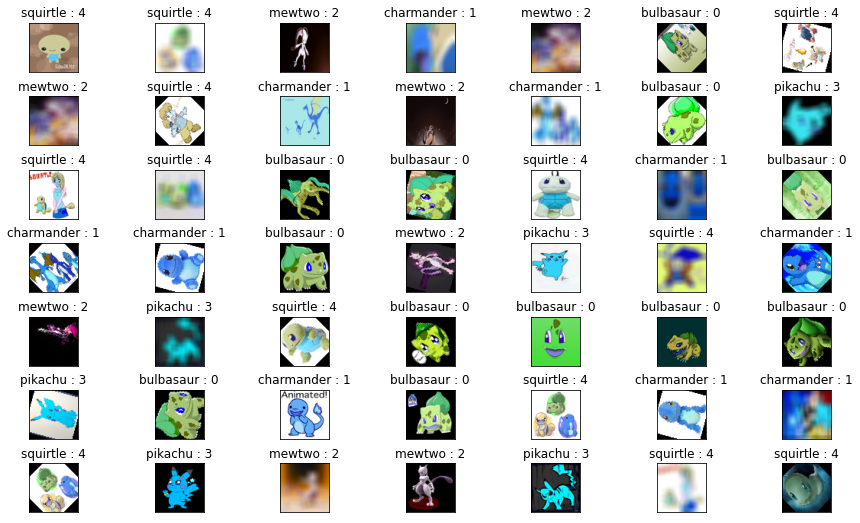

In [10]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , pokemon.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(pokemon[r[0]])
    plt.title('{} : {}'.format(pokemon_type(labels[r[0]]),
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

In [11]:
pokemon = pokemon.astype(np.float32)
labels = labels.astype(np.int32)
pokemon = pokemon/255

In [12]:
from sklearn.model_selection import train_test_split

train_x , test_x , train_y , test_y = train_test_split(pokemon , labels , 
                                            test_size = 0.2 ,
                                            random_state = 111)


In [13]:
#eval_x , test_x , eval_y , test_y = train_test_split(x , y , 
#                                                    test_size = 0.5 , 
#                                                   random_state = 111)

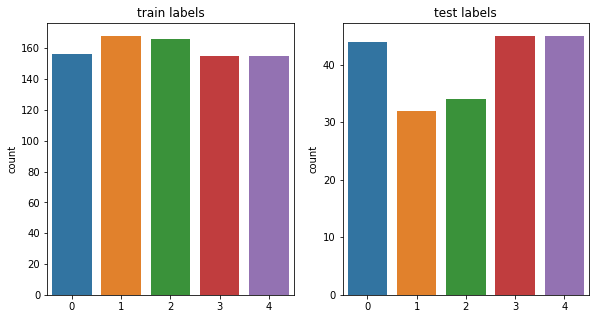

In [14]:
plt.figure(1 , figsize = (15 ,5))
n = 0 
for z , j in zip([train_y , test_y] , ['train labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

In [15]:
from keras.utils.np_utils import to_categorical

# One-hot encoding on the labels
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [16]:
print('train data shape {}  , test data shape {}'.format(train_x.shape, test_x.shape))

train data shape (800, 64, 64, 3)  , test data shape (200, 64, 64, 3)


### Prepare the VGG16 model

In [17]:
#Load VGG16 without the top classification layer
#Prepare a custom classifier
#Stack both models on top of each other

In [18]:
from keras import Model
from keras.applications import vgg16
from keras.layers import Dropout, Flatten, Dense

In [19]:
## importing VGG16 from keras with pre-trained weights that is trained on imagenet
# include_top > False to exclude the top classification layer 
# weights > to use the weights from pre-training on Imagenet
IMAGE_DIMS = (64, 64, 3)

base_model = vgg16.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=IMAGE_DIMS)

print(base_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [20]:
for i, layer in enumerate(base_model.layers):
    print('Layer {}: {} ({})'.format(i, layer.name, layer.trainable))

Layer 0: input_1 (True)
Layer 1: block1_conv1 (True)
Layer 2: block1_conv2 (True)
Layer 3: block1_pool (True)
Layer 4: block2_conv1 (True)
Layer 5: block2_conv2 (True)
Layer 6: block2_pool (True)
Layer 7: block3_conv1 (True)
Layer 8: block3_conv2 (True)
Layer 9: block3_conv3 (True)
Layer 10: block3_pool (True)
Layer 11: block4_conv1 (True)
Layer 12: block4_conv2 (True)
Layer 13: block4_conv3 (True)
Layer 14: block4_pool (True)
Layer 15: block5_conv1 (True)
Layer 16: block5_conv2 (True)
Layer 17: block5_conv3 (True)
Layer 18: block5_pool (True)


In [21]:
#Freeze base layers of VGG16  
#freeze the "deep layers" of the model and only re-train the last few layers on our own data
for layer in base_model.layers:
     layer.trainable = False

In [22]:
for i, layer in enumerate(base_model.layers):
    print('Layer {}: {} ({})'.format(i, layer.name, layer.trainable))

Layer 0: input_1 (False)
Layer 1: block1_conv1 (False)
Layer 2: block1_conv2 (False)
Layer 3: block1_pool (False)
Layer 4: block2_conv1 (False)
Layer 5: block2_conv2 (False)
Layer 6: block2_pool (False)
Layer 7: block3_conv1 (False)
Layer 8: block3_conv2 (False)
Layer 9: block3_conv3 (False)
Layer 10: block3_pool (False)
Layer 11: block4_conv1 (False)
Layer 12: block4_conv2 (False)
Layer 13: block4_conv3 (False)
Layer 14: block4_pool (False)
Layer 15: block5_conv1 (False)
Layer 16: block5_conv2 (False)
Layer 17: block5_conv3 (False)
Layer 18: block5_pool (False)


In [23]:
#Build classification layers
from keras import models
model = models.Sequential(base_model.layers)
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 16, 16, 256)       2

In [24]:
for i, layer in enumerate(model.layers):
    print('Layer {}: {} ({})'.format(i, layer.name, layer.trainable))

Layer 0: block1_conv1 (False)
Layer 1: block1_conv2 (False)
Layer 2: block1_pool (False)
Layer 3: block2_conv1 (False)
Layer 4: block2_conv2 (False)
Layer 5: block2_pool (False)
Layer 6: block3_conv1 (False)
Layer 7: block3_conv2 (False)
Layer 8: block3_conv3 (False)
Layer 9: block3_pool (False)
Layer 10: block4_conv1 (False)
Layer 11: block4_conv2 (False)
Layer 12: block4_conv3 (False)
Layer 13: block4_pool (False)
Layer 14: block5_conv1 (False)
Layer 15: block5_conv2 (False)
Layer 16: block5_conv3 (False)
Layer 17: block5_pool (False)
Layer 18: flatten (True)
Layer 19: dense (True)
Layer 20: dense_1 (True)
Layer 21: dense_2 (True)


In [25]:
lr = 0.008
opt = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-07) #epsilon is the error
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### Perform training on our dataset

In [26]:
history = model.fit(train_x, train_y, validation_split=0.2, epochs=20, batch_size=32, verbose=1, shuffle=True)

test_loss, test_acc = model.evaluate(test_x, test_y, verbose=1)
print('Test loss: {:.4f}'.format(test_loss))
print('Test accuracy: {:.4f}'.format(test_acc))

Epoch 1/20
20/20 [==============================] - 9s 409ms/step - loss: 1.6052 - accuracy: 0.3281 - val_loss: 1.3531 - val_accuracy: 0.4000
Epoch 2/20
20/20 [==============================] - 8s 414ms/step - loss: 1.0494 - accuracy: 0.5609 - val_loss: 0.9939 - val_accuracy: 0.6187
Epoch 3/20
20/20 [==============================] - 9s 430ms/step - loss: 0.7587 - accuracy: 0.7031 - val_loss: 0.8846 - val_accuracy: 0.6438
Epoch 4/20
20/20 [==============================] - 8s 413ms/step - loss: 0.5605 - accuracy: 0.7984 - val_loss: 0.7126 - val_accuracy: 0.7437
Epoch 5/20
20/20 [==============================] - 9s 438ms/step - loss: 0.4408 - accuracy: 0.8516 - val_loss: 0.7169 - val_accuracy: 0.7500
Epoch 6/20
20/20 [==============================] - 9s 442ms/step - loss: 0.3176 - accuracy: 0.8969 - val_loss: 0.6749 - val_accuracy: 0.7563
Epoch 7/20
20/20 [==============================] - 9s 455ms/step - loss: 0.2287 - accuracy: 0.9187 - val_loss: 0.6625 - val_accuracy: 0.7750
Epoch 

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

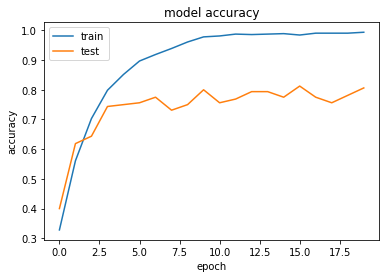

In [28]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

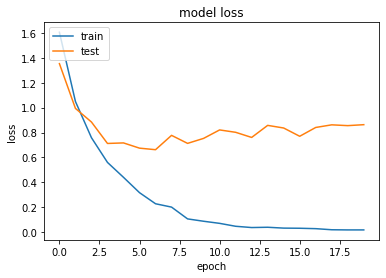

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Perform Prediction

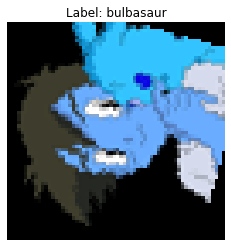

In [30]:
#Predict an image by randomly choosing 1 from the dataset

%matplotlib inline
import matplotlib.pyplot as plt
import random

imgSize = len(test_x)
selected = random.randint(0, imgSize)
img = test_x[selected]

# To create a mapping of the label class to allow display of the description instead of a number
categories = pokemon_list

plt.imshow(img)
plt.axis('off')
class_index = np.where(test_y == 1)[0][0]
plt.title('Label: {}'.format(categories[class_index]))
plt.show()

In [31]:
# Run the image through the deep neural network to make a prediction
image = np.expand_dims(img, axis=0)
prob = model.predict(image)    
    
print('Probability: {}\n'.format(prob[0]))
idx = np.argmax(prob)
predictions = categories[idx]
print('Predicted class: {} - {}'.format(idx, predictions))

Probability: [3.7129537e-09 3.2126336e-06 6.5501325e-07 9.9999607e-01 6.9803735e-10]

Predicted class: 3 - pikachu


### Conclusion
VGG16 model is used as the base model with transfer learning for the classification of Pokemon characters. And it gives around 80% accuracy. The model also predicts quite well.